In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
# Load the dataset
dataset = pd.read_excel("data_electricity.xlsx", parse_dates=['datetime'], index_col='datetime')

In [49]:
dataset.head()

,megawatt
datetime,
2023-01-25 00:00:00,17483
2023-01-25 00:15:00,22639
2023-01-25 00:30:00,22471
2023-01-25 00:45:00,25006
2023-01-25 01:00:00,19536


In [ ]:
data

In [50]:
dataset = dataset.sort_values('datetime')

In [51]:
# split into train and test
cutoff_date = '2023-03-01'
train = dataset[dataset.index < cutoff_date]
test = dataset[dataset.index >= cutoff_date]

print(train)
print(test)

                     megawatt
datetime                     
2023-01-25 00:00:00     17483
2023-01-25 00:15:00     22639
2023-01-25 00:30:00     22471
2023-01-25 00:45:00     25006
2023-01-25 01:00:00     19536
...                       ...
2023-02-28 22:45:00     13384
2023-02-28 23:00:00     25574
2023-02-28 23:15:00     17426
2023-02-28 23:30:00     10352
2023-02-28 23:45:00     16228

[3360 rows x 1 columns]
                     megawatt
datetime                     
2023-03-01 00:00:00     18295
2023-03-01 00:15:00     13195
2023-03-01 00:30:00     22974
2023-03-01 00:45:00     20138
2023-03-01 01:00:00     19636
...                       ...
2023-03-17 23:00:00     15338
2023-03-17 23:15:00     18101
2023-03-17 23:30:00     25620
2023-03-17 23:45:00     18518
2023-03-18 00:00:00     11202

[1633 rows x 1 columns]


In [52]:
# Train the ARIMA model
model = ARIMA(train, order=(2, 1, 2)) # (p,d,q) = (2,1,2)
model_fit = model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


In [53]:
# Make predictions on the testing data
predictions = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)

# Print the predicted values
print(predictions)

2023-03-01 00:00:00    17538.582152
2023-03-01 00:15:00    17510.322622
2023-03-01 00:30:00    17509.592691
2023-03-01 00:45:00    17508.302397
2023-03-01 01:00:00    17507.029190
                           ...     
2023-03-17 23:00:00    17210.012425
2023-03-17 23:15:00    17210.011199
2023-03-17 23:30:00    17210.009978
2023-03-17 23:45:00    17210.008762
2023-03-18 00:00:00    17210.007551
Freq: 15T, Name: predicted_mean, Length: 1633, dtype: float64


In [27]:
test = test.drop('megawatt',axis=1)

In [41]:
# Make predictions on the testing set
predictions = model_fit.forecast(steps=len(test))[1]


In [69]:
print(predictions)

2023-03-01 00:00:00    17538.582152
2023-03-01 00:15:00    17510.322622
2023-03-01 00:30:00    17509.592691
2023-03-01 00:45:00    17508.302397
2023-03-01 01:00:00    17507.029190
                           ...     
2023-03-17 23:00:00    17210.012425
2023-03-17 23:15:00    17210.011199
2023-03-17 23:30:00    17210.009978
2023-03-17 23:45:00    17210.008762
2023-03-18 00:00:00    17210.007551
Freq: 15T, Name: predicted_mean, Length: 1633, dtype: float64


In [56]:
print(test.shape)

(1633, 1)


In [55]:
print(train.shape)

(3360, 1)


In [54]:
print(predictions.shape)

(1633,)


In [57]:
# Evaluate the performance of the model using MAE, MSE, and RMSE
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

MAE:  4142.103839328284
MSE:  22558049.648109473
RMSE:  4749.5315188036675


In [78]:
n_steps = 10
forecast = model_fit.forecast(steps=n_steps)

# Print the predicted values
print("Predicted values for the next {} steps: {}".format(n_steps, forecast[0]))

Predicted values for the next 10 steps: 17538.5821520811


In [79]:
# Forecast future values
forecast = model_fit.forecast(steps=50)[0]

# Convert to DataFrame
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start='2023-03-25 00:00:00', periods=25, freq='24H'), columns=['forecasted_kilowatt'])

# Print the forecasted values
print(forecast_df)

            forecasted_megawatt
2023-03-25         17538.582152
2023-03-26         17538.582152
2023-03-27         17538.582152
2023-03-28         17538.582152
2023-03-29         17538.582152
2023-03-30         17538.582152
2023-03-31         17538.582152
2023-04-01         17538.582152
2023-04-02         17538.582152
2023-04-03         17538.582152
2023-04-04         17538.582152
2023-04-05         17538.582152
2023-04-06         17538.582152
2023-04-07         17538.582152
2023-04-08         17538.582152
2023-04-09         17538.582152
2023-04-10         17538.582152
2023-04-11         17538.582152
2023-04-12         17538.582152
2023-04-13         17538.582152
2023-04-14         17538.582152
2023-04-15         17538.582152
2023-04-16         17538.582152
2023-04-17         17538.582152
2023-04-18         17538.582152


In [1]:
forecast_df

NameError: name 'forecast_df' is not defined

In [86]:
forecast_df[['megawatt','forecasted_megawatt']].plot(figsize=(12,8)) 

KeyError: "['megawatt'] not in index"

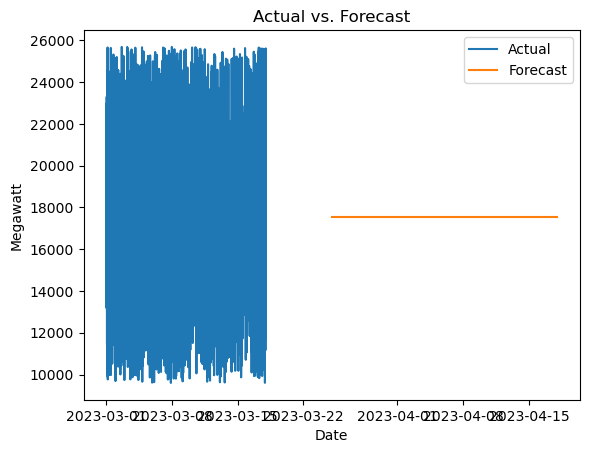

In [91]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.plot(test.index, test['megawatt'], label='Actual')

# Plot the predicted values
plt.plot(forecast_df.index, forecast_df['forecasted_megawatt'], label='Forecast')

# Set the title, x-axis label, and y-axis label
plt.title('Actual vs. Forecast')
plt.xlabel('Date')
plt.ylabel('Megawatt')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [82]:
# SARIMA

In [81]:
import statsmodels.api as sm

In [84]:
model = sm.tmodel=sm.tsa.statespace.SARIMAX(dataset['megawatt'],order=(1, 1, 0),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


In [ ]:
final_data['forecast'] = results.predict(start=100,end = 167,dynamic=True)
final_data[['AEP_MW','forecast']].plot(figsize=(12,8))